# Groundwater Quality Prediction


# import Libraries


In [2]:
import pandas as pd
import os

# Path to your directory containing CSV files
directory = r"E:\Downloads\Data Science\project\pp"


# List of file names
files = [
    'Ground Water 2012.csv',
    'Ground Water 2013.csv',
    'Ground Water 2014.csv',
    'Ground Water 2015.csv',
    'Ground Water 2016.csv',
    'Ground Water 2017.csv',
    'Ground Water 2018.csv',
    'Ground Water 2019.csv',
    'Ground Water 2021.csv'
]

# List to hold the data from each file
df_list = []

# Load each file and append to the list
for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Combine all the data into a single DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Display information about the combined DataFrame
print(df_combined.info())
print(df_combined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Code                 6240 non-null   float64
 1   Station Name                 6267 non-null   object 
 2   STATE                        6241 non-null   object 
 3   Temperature Min              5818 non-null   float64
 4   Temperature Max              5818 non-null   float64
 5   pH Min                       6195 non-null   float64
 6   pH Max                       6195 non-null   float64
 7   Conductivity (µmhos/cm) Min  6124 non-null   float64
 8   Conductivity (µmhos/cm) Max  6124 non-null   float64
 9   Year                         6316 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 493.6+ KB
None
   Station Code                                       Station Name  \
0          15.0                              WELL AT KUYYU

In [3]:
import os

directory = r"E:\Downloads\Data Science\project\pp"
print(os.listdir(directory))


['Ground Water 2012.csv', 'Ground Water 2013.csv', 'Ground Water 2014.csv', 'Ground Water 2015.csv', 'Ground Water 2016.csv', 'Ground Water 2017.csv', 'Ground Water 2018.csv', 'Ground Water 2019.csv', 'Ground Water 2021.csv', 'Years.xlsx']


## Load Excel file

In [4]:
# Load Excel file
df_years = pd.read_excel(r"E:\Downloads\Data Science\project\pp\Years.xlsx")


# Check the contents
print(df_years.info())
print(df_years.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S.No.   10 non-null     int64
 1   Year    10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes
None
   S.No.  Year
0      1  2012
1      2  2013
2      3  2014
3      4  2015
4      5  2016


## Get summary statistics for numerical columns

In [5]:
# Get summary statistics for numerical columns
print(df_combined.describe())


       Station Code  Temperature Min  Temperature Max       pH Min  \
count   6240.000000      5818.000000      5818.000000  6195.000000   
mean    2600.109615        25.243589        27.175799     7.155052   
std      942.700394         4.694067         4.515805     0.698224   
min        3.000000         0.000000         0.000000     0.000000   
25%     1841.000000        23.000000        25.000000     6.900000   
50%     2454.000000        26.000000        28.000000     7.200000   
75%     3214.250000        28.000000        30.000000     7.600000   
max     4912.000000        67.000000        70.000000     9.600000   

            pH Max  Conductivity (µmhos/cm) Min  Conductivity (µmhos/cm) Max  \
count  6195.000000                  6124.000000                  6124.000000   
mean      7.631516                  1303.856199                  1728.061300   
std       8.849163                  3102.087896                  3725.717739   
min       4.600000                     0.000000  

In [6]:
df_combined.columns

Index(['Station Code', 'Station Name', 'STATE', 'Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max', 'Year'],
      dtype='object')

In [31]:
df_combined.shape

(6269, 3583)

In [7]:
df_combined.value_counts()

Station Code  Station Name                                                                                                               STATE       Temperature Min  Temperature Max  pH Min  pH Max  Conductivity (µmhos/cm) Min  Conductivity (µmhos/cm) Max  Year
3.0           WELL AT AHMEDABAD                                                                                                          GUJARAT     18.0             30.0             7.7     8.0     1330.0                       1336.0                       2018    1
2964.0        WELL AT IIA PUBLIC\nSCHOOL, MANPUR\nMACHERI, JAIPUR,\nRAJASTHAN                                                            RAJASTHAN   26.0             29.0             8.0     7.8     1130.0                       1350.0                       2015    1
2966.0        SHRI GIRDHARI SINGH\nRAJPUROHIT NEAR VILLAGE\nPUNAYATA, JODHPUR-SUMERPUR BYE PASS ROAD,\nPALI, RAJASTHAN                   RAJASTHAN   19.5             19.5             8.5     8.5     4900.

## Check for missing values

In [8]:
# Check for missing values
missing_values = df_combined.isnull().sum()
print(missing_values[missing_values > 0])  # Only display columns with missing values

# # Option 1: Fill missing values
# df_combined.fillna(df_combined.mean(), inplace=True)  # Replace with mean for numerical columns

# # Option 2: Drop rows with missing values
# # df_combined.dropna(inplace=True)


Station Code                    76
Station Name                    49
STATE                           75
Temperature Min                498
Temperature Max                498
pH Min                         121
pH Max                         121
Conductivity (µmhos/cm) Min    192
Conductivity (µmhos/cm) Max    192
dtype: int64


## Fill numerical columns with the mean

In [9]:
# Fill numerical columns with the mean
df_combined['Temperature Min'] = df_combined['Temperature Min'].fillna(df_combined['Temperature Min'].mean())
df_combined['Temperature Max'] = df_combined['Temperature Max'].fillna(df_combined['Temperature Max'].mean())
df_combined['pH Min'] = df_combined['pH Min'].fillna(df_combined['pH Min'].mean())
df_combined['pH Max'] = df_combined['pH Max'].fillna(df_combined['pH Max'].mean())
df_combined['Conductivity (µmhos/cm) Min'] = df_combined['Conductivity (µmhos/cm) Min'].fillna(df_combined['Conductivity (µmhos/cm) Min'].mean())
df_combined['Conductivity (µmhos/cm) Max'] = df_combined['Conductivity (µmhos/cm) Max'].fillna(df_combined['Conductivity (µmhos/cm) Max'].mean())

# Fill categorical columns with the mode
df_combined['Station Code'] = df_combined['Station Code'].fillna(df_combined['Station Code'].mode()[0])
df_combined['Station Name'] = df_combined['Station Name'].fillna(df_combined['Station Name'].mode()[0])
df_combined['STATE'] = df_combined['STATE'].fillna(df_combined['STATE'].mode()[0])



## Check for missing values

In [10]:
# Check for missing values
missing_values = df_combined.isnull().sum()
print(missing_values[missing_values > 0])  # Only display columns with missing values

Series([], dtype: int64)


In [11]:
# Convert date columns to datetime (if applicable)
if 'Date' in df_combined.columns:
    df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')

# Convert categorical columns to 'category' dtype
for column in df_combined.select_dtypes(include=['object']).columns:
    df_combined[column] = df_combined[column].astype('category')


## Check for duplicates

In [12]:
# Check for duplicates
duplicates = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



Number of duplicate rows: 47


## Remove duplicates

In [13]:

# Remove duplicates
df_combined.drop_duplicates(inplace=True)

In [14]:
duplicates = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [15]:
# Create a 'Year' column if it doesn't exist
if 'Date' in df_combined.columns:
    df_combined['Year'] = df_combined['Date'].dt.year


int64


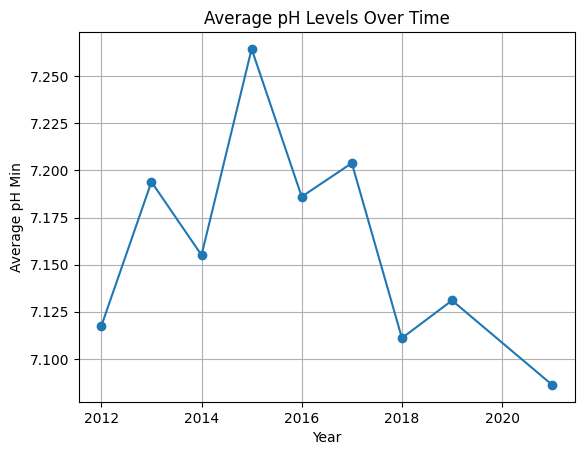

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Check the dtype of the 'Year' column
print(df_combined['Year'].dtype)

# No need to convert to datetime, just use the Year directly for grouping
# Assuming you're using 'pH Min' for the average
yearly_pH = df_combined.groupby('Year')['pH Min'].mean()

# Plotting the data
plt.plot(yearly_pH.index, yearly_pH.values, marker='o')
plt.title('Average pH Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Average pH Min')
plt.grid(True)
plt.show()



In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = df_combined.select_dtypes(include=['float64', 'int']).columns

# Standardize the numerical columns
scaler = StandardScaler()
df_combined[numerical_cols] = scaler.fit_transform(df_combined[numerical_cols])


## One-hot encoding for categorical variables

In [18]:
# One-hot encoding for categorical variables
df_combined = pd.get_dummies(df_combined, columns=['Station Name', 'STATE'], drop_first=True)




In [19]:
df_combined

,Station Code,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,"Station Name_(JORHAT, ASSAM","Station Name_*(JORHAT, ASSAM",...,STATE_Rajasthan,STATE_TAMIL NADU,STATE_TELANGANA,STATE_TRIPURA,STATE_UTTAR PRADESH,STATE_UTTARAKHAND,STATE_UTTRAKHAND,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_WEST BENGAL
0,-2.747910,-0.496185,0.189473,-0.482760,0.024839,-0.361691,-0.407939,-1.810599,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-2.746847,0.388442,0.189473,0.079171,0.010060,-0.209037,-0.164869,-1.810599,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-2.736214,0.167285,1.109021,0.050354,-0.027457,0.096924,-0.018213,-1.810599,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-2.735151,0.167285,-0.040414,0.958090,0.132842,0.037884,-0.016312,-1.810599,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1.155138,-0.053871,0.649247,-0.511577,-0.059290,0.048975,-0.041569,-1.810599,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,-0.070607,0.388442,0.649247,0.064763,0.030523,-0.308523,-0.292515,1.503888,False,False,...,False,False,False,False,False,False,False,False,False,True
6312,-0.878689,0.609599,0.879134,0.208848,-0.026320,0.042777,0.000527,1.503888,False,False,...,False,False,False,False,False,False,False,False,False,True
6313,-0.877626,0.830756,0.879134,0.208848,-0.037689,0.130847,0.052399,1.503888,False,False,...,False,False,False,False,False,False,False,False,False,True
6314,-0.056785,0.167285,0.649247,0.064763,-0.003583,-0.128796,-0.173288,1.503888,False,False,...,False,False,False,False,False,False,False,False,False,True


## Display the final structure and summary statistics

In [20]:
# Display the final structure and summary statistics
print(df_combined.info())
print(df_combined.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 6269 entries, 0 to 6315
Columns: 3581 entries, Station Code to STATE_WEST BENGAL
dtypes: bool(3573), float64(8)
memory usage: 21.8 MB
None
       Station Code  Temperature Min  Temperature Max        pH Min  \
count  6.269000e+03     6.269000e+03     6.269000e+03  6.269000e+03   
mean  -2.176172e-16     1.598126e-16     6.936547e-16 -9.520751e-17   
std    1.000080e+00     1.000080e+00     1.000080e+00  1.000080e+00   
min   -2.760669e+00    -5.582792e+00    -6.247363e+00 -1.030936e+01   
25%   -8.053238e-01    -3.413752e-01    -5.001880e-01 -3.674923e-01   
50%   -1.556684e-01     1.672855e-01     0.000000e+00  6.476265e-02   
75%    6.524135e-01     6.095991e-01     6.492471e-01  6.411026e-01   
max    2.458902e+00     9.234715e+00     9.844728e+00  3.522802e+00   

             pH Max  Conductivity (µmhos/cm) Min  Conductivity (µmhos/cm) Max  \
count  6.269000e+03                 6.269000e+03                 6.269000e+03   
mean   8.44400

In [21]:
# Fill missing values
for column in df_combined.columns:
    if df_combined[column].dtype in ['float64', 'int64']:
        df_combined[column] = df_combined[column].fillna(df_combined[column].mean())
    elif df_combined[column].dtype == 'object':
        df_combined[column] = df_combined[column].fillna("Unknown")


In [22]:
print(df_combined.dtypes)


Station Code           float64
Temperature Min        float64
Temperature Max        float64
pH Min                 float64
pH Max                 float64
                        ...   
STATE_UTTARAKHAND         bool
STATE_UTTRAKHAND          bool
STATE_Uttar Pradesh       bool
STATE_Uttarakhand         bool
STATE_WEST BENGAL         bool
Length: 3581, dtype: object


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and combine datasets (as shown earlier)
df_combined = pd.concat(df_list, ignore_index=True)

# Check for missing values
print(df_combined.isnull().sum())

# Fill missing values
for column in df_combined.columns:
    if df_combined[column].dtype in ['float64', 'int64']:
        df_combined[column] = df_combined[column].fillna(df_combined[column].mean())
    elif df_combined[column].dtype == 'object':
        df_combined[column] = df_combined[column].fillna("Unknown")

# Convert date columns to datetime
if 'Date' in df_combined.columns:
    df_combined['Date'] = pd.to_datetime(df_combined['Date'], errors='coerce')

# Convert categorical columns to category dtype
for column in df_combined.select_dtypes(include=['object']).columns:
    df_combined[column] = df_combined[column].astype('category')

# Remove duplicates
df_combined = df_combined.drop_duplicates()

# Create a 'Year' column
if 'Date' in df_combined.columns:
    df_combined['Year'] = df_combined['Date'].dt.year

# Standardize numerical columns
numerical_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_combined[numerical_cols] = scaler.fit_transform(df_combined[numerical_cols])

# One-hot encoding for categorical variables
df_combined = pd.get_dummies(df_combined, columns=['Station Name', 'STATE'], drop_first=True)

# Final check
print(df_combined.info())
print(df_combined.describe())


Station Code                    76
Station Name                    49
STATE                           75
Temperature Min                498
Temperature Max                498
pH Min                         121
pH Max                         121
Conductivity (µmhos/cm) Min    192
Conductivity (µmhos/cm) Max    192
Year                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6269 entries, 0 to 6315
Columns: 3583 entries, Station Code to STATE_WEST BENGAL
dtypes: bool(3575), float64(8)
memory usage: 21.8 MB
None
       Station Code  Temperature Min  Temperature Max        pH Min  \
count  6.269000e+03     6.269000e+03     6.269000e+03  6.269000e+03   
mean  -2.538867e-16     1.598126e-16     6.936547e-16 -9.520751e-17   
std    1.000080e+00     1.000080e+00     1.000080e+00  1.000080e+00   
min   -2.761584e+00    -5.582792e+00    -6.247363e+00 -1.030936e+01   
25%   -8.061205e-01    -3.413752e-01    -5.001880e-01 -3.674923e-01   
50%   -1.532360e-01     1.6

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_combined is your DataFrame
# Select features (X) and target variable (y)
# We will predict 'Temperature Min' as an example
X = df_combined.drop(columns=['Temperature Min', 'Station Name_(JORHAT, ASSAM', 'Station Name_*(JORHAT, ASSAM'], errors='ignore')  
y = df_combined['Temperature Min']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Using Linear Regression as an example)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and Model Evaluation for Linear Regression
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print performance for Linear Regression
print(f"Linear Regression Mean Squared Error: {mse_linear}")
print(f"Linear Regression R² Score: {r2_linear}")

# Model Training (Using Random Forest Regressor as another example)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Model Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print performance for Random Forest Regressor
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")



Linear Regression Mean Squared Error: 5.442305442082172e+21
Linear Regression R² Score: -5.045898594650889e+21
Random Forest Mean Squared Error: 0.22292633710408483
Random Forest R² Score: 0.7933111797793896


## Feature Importance Analysis

In [34]:
#Feature Importance Analysis
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_importance)


                                                      Importance
Temperature Max                                     7.181230e-01
STATE_MIZORAM                                       2.722684e-02
Station Code                                        1.933885e-02
Conductivity (µmhos/cm) Min                         1.866312e-02
Conductivity (µmhos/cm) Max                         1.769262e-02
...                                                          ...
Station Name_WELL-1 ROHTAS\nBOREWELL WATER\nFRO... -9.452058e-21
Station Name_Borewell at Manakondur                -1.414273e-20
Station Name_WELL AT INDIA PUBLIC SCHOOL,\nMANP... -1.596179e-20
Station Name_Open well at Kundanpally near ash ... -9.017457e-20
Station Name_Borewell at Pydipally near East si... -1.104064e-19

[3580 rows x 1 columns]


In [35]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR R² Score: {r2_svr}")


SVR Mean Squared Error: 0.2658362808706319
SVR R² Score: 0.7535267121025202


In [25]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [29]:
import pickle

with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

print(type(model))  # Check the type of the loaded model


<class 'numpy.ndarray'>
